In [1]:
import torch

In [2]:
x = torch.randn(3,4,requires_grad=True) #requires_grad=True 记录操作

In [3]:
x

tensor([[ 1.0370, -0.6971, -1.9705,  0.4021],
        [-0.2185,  1.3367, -0.9631, -0.3687],
        [-1.5128, -0.4238, -0.1397, -0.1173]], requires_grad=True)

In [4]:
b = torch.randn(3,4)
b.requires_grad=True

In [5]:
b

tensor([[ 0.7116, -1.1579,  0.3331,  0.1143],
        [-0.0919,  1.3079,  0.0575, -0.6408],
        [-0.7733,  0.4548, -3.0531, -0.5621]], requires_grad=True)

In [31]:
t = x+b

In [32]:
y = t.sum()
y

tensor(-2.8660, grad_fn=<SumBackward0>)

In [33]:
y.backward() #回代，自动求导

In [34]:
print(b.grad) #b求导

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [36]:
x.requires_grad,b.requires_grad,t.requires_grad #t也被记录操作了

(True, True, True)

In [14]:
x = torch.rand(1)
b = torch.rand(1,requires_grad=True)
w = torch.rand(1,requires_grad=True)
y = w*x
z = y+b
z.backward()

In [10]:
x.requires_grad,b.requires_grad,w.requires_grad,y.requires_grad

(False, True, True, True)

In [11]:
x.is_leaf,y.is_leaf,b.is_leaf,w.is_leaf,z.is_leaf #是不是叶子

(True, False, True, True, False)

In [16]:
w.grad

tensor([0.0310])

In [17]:
b.grad

tensor([1.])

In [60]:
x = torch.rand(1)
b = torch.rand(1,requires_grad=True)
w = torch.rand(1,requires_grad=True)
y = w*x
z = y+b
z.backward(retain_graph=True)#重复执行梯度

In [61]:
w.grad

tensor([0.6438])

In [62]:
b.grad

tensor([1.])

In [63]:
w.grad

tensor([0.6438])

In [64]:
b.grad

tensor([1.])

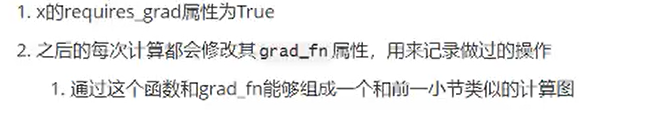

In [67]:
a = torch.randn(2,2)
a = ((a * 3)/(a - 1))
print(a.requires_grad)

False


In [68]:
a.requires_grad_(True)#修改requires_grad

tensor([[ 1.3986,  0.2986],
        [ 0.5805, -0.1048]], requires_grad=True)

In [69]:
b = (a * a).sum()

In [74]:
print(b.grad_fn)

In [75]:
with torch.no_grad():#拒绝记录追踪操作
    c = (a * a).sum()

In [76]:
print(c.grad_fn)

None


In [77]:
print(c.requires_grad)

False


In [78]:
#当数据是向量时调用backward()要传入其他参数，不然会报错

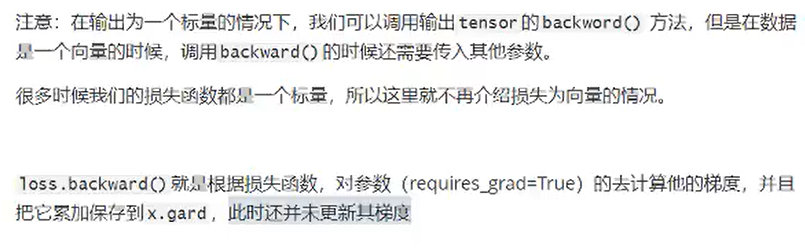

In [79]:
a

tensor([[ 1.3986,  0.2986],
        [ 0.5805, -0.1048]], requires_grad=True)

In [83]:
a.data  #只提取数据

tensor([[ 1.3986,  0.2986],
        [ 0.5805, -0.1048]])

In [91]:
a.detach() #只提取数据

tensor([[ 1.3986,  0.2986],
        [ 0.5805, -0.1048]])

In [88]:
a.numpy() #带requires_grad不能直接转化numpy格式

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [87]:
a.data.numpy()

array([[ 1.3985527 ,  0.29861763],
       [ 0.58051294, -0.10484292]], dtype=float32)

In [90]:
a.detach().numpy()

array([[ 1.3985527 ,  0.29861763],
       [ 0.58051294, -0.10484292]], dtype=float32)

### 线性回归:迭代出结果

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [119]:
x = torch.rand([50])

In [120]:
y = 3*x + 0.8

In [136]:
w = torch.rand(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)
loss_list=[]

In [137]:
def loss_fn(y,y_predict):
    loss=(y_predict-y).pow(2).mean()
    loss_list.append(loss.data)
    for i in[w,b]:
        #每次反向前把梯度置为0
        if i.grad is not None:
            i.grad.data.zero_()
    loss.backward()
    return loss.data    
def optimize(learning_rate): #梯度下降
    w.data = w.data -learning_rate*w.grad.data
    b.data = b.data -learning_rate*b.grad.data

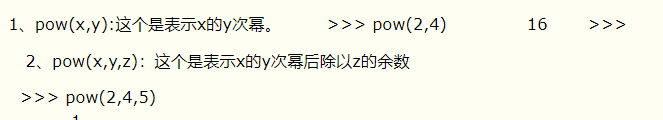

In [138]:
for i in range(7000): #梯度下降3000次
    y_predict = x*w + b
    loss = loss_fn(y,y_predict)
    learning_rate=0.01
    optimize(learning_rate)

In [139]:
loss

tensor(2.5620e-09)

In [140]:
w

tensor([2.9998], requires_grad=True)

In [141]:
b

tensor([0.8001], requires_grad=True)

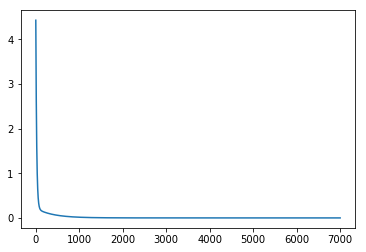

In [142]:
plt.plot(range(7000),loss_list) #迭代效果

In [160]:
from sklearn.linear_model import LinearRegression as LR

In [164]:
kk=LR().fit(x.data.numpy().reshape(50,1),y.data.numpy().reshape(-1))

In [165]:
kk.coef_

array([3.], dtype=float32)

In [166]:
kk.intercept_

0.79999983

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
if torch.cuda.is_available():
    x = torch.rand([50])
    device = torch.device("cuda")
    y = torch.ones_like(x,device=device)
    x = x.to(device)
    z = x+y
    print(z)
    print(z.to("cpu",torch.double))

tensor([1.4670, 1.0264, 1.2506, 1.6048, 1.3830, 1.3002, 1.4242, 1.8668, 1.0346,
        1.6649, 1.7218, 1.3534, 1.4662, 1.2158, 1.8693, 1.6637, 1.7533, 1.8722,
        1.5259, 1.1032, 1.4800, 1.1453, 1.9698, 1.0474, 1.4137, 1.8305, 1.0997,
        1.8342, 1.9150, 1.4144, 1.5310, 1.3139, 1.9887, 1.2845, 1.6719, 1.5002,
        1.0857, 1.4530, 1.4677, 1.5325, 1.1113, 1.6912, 1.8922, 1.2985, 1.7316,
        1.7989, 1.4950, 1.4477, 1.5188, 1.2192], device='cuda:0')
tensor([1.4670, 1.0264, 1.2506, 1.6048, 1.3830, 1.3002, 1.4242, 1.8668, 1.0346,
        1.6649, 1.7218, 1.3534, 1.4662, 1.2158, 1.8693, 1.6637, 1.7533, 1.8722,
        1.5259, 1.1032, 1.4800, 1.1453, 1.9698, 1.0474, 1.4137, 1.8305, 1.0997,
        1.8342, 1.9150, 1.4144, 1.5310, 1.3139, 1.9887, 1.2845, 1.6719, 1.5002,
        1.0857, 1.4530, 1.4677, 1.5325, 1.1113, 1.6912, 1.8922, 1.2985, 1.7316,
        1.7989, 1.4950, 1.4477, 1.5188, 1.2192], dtype=torch.float64)


In [2]:
y.to('cpu').data.numpy()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [5]:
y.cpu().data.numpy()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [7]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)

[2. 2. 2. 2. 2.]


In [8]:
print(b) #a和b内存共享

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [9]:
a = a + 1
a

array([3., 3., 3., 3., 3.])

In [10]:
b

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [11]:
y.cpu()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
kk=np.random.randint(10,20,(5,5))
kk

array([[19, 19, 13, 10, 17],
       [10, 18, 13, 13, 14],
       [17, 12, 19, 16, 11],
       [13, 16, 12, 15, 14],
       [11, 19, 15, 17, 12]])

In [34]:
np.maximum(kk,0)

array([[19, 19, 13, 10, 17],
       [10, 18, 13, 13, 14],
       [17, 12, 19, 16, 11],
       [13, 16, 12, 15, 14],
       [11, 19, 15, 17, 12]])

In [30]:
x_1=torch.randint(5,10,(5,5))
w_1=torch.randint(1,5,(5,5))

In [40]:
w_1

tensor([[2, 3, 4, 1, 4],
        [2, 2, 4, 4, 4],
        [1, 2, 3, 4, 2],
        [2, 1, 1, 4, 3],
        [3, 4, 2, 1, 2]])

In [37]:
x_1.mm(w_1) #矩阵的乘法，torch里面的,等价于numpy里面的dot

tensor([[ 62,  72,  88,  88,  97],
        [ 67,  81, 102,  94, 108],
        [ 81,  99, 118, 116, 123],
        [ 73,  89, 103,  99, 108],
        [ 75,  88, 101, 106, 110]])

In [41]:
w_1.clamp(min=0) #夹子，如果有小于0用0替代

tensor([[2, 3, 4, 1, 4],
        [2, 2, 4, 4, 4],
        [1, 2, 3, 4, 2],
        [2, 1, 1, 4, 3],
        [3, 4, 2, 1, 2]])

In [60]:
x=torch.randn(64,1000)
y=torch.randn(64,10)
learning_rate=0.000001
from torch import nn 
N,D_in,H,D_out = 64,1000,100,10
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)
model = nn.Sequential(nn.Linear(D_in,H),
                      nn.ReLU(),
                      nn.Linear(H,D_out))
loss_fn = nn.MSELoss(reduction='sum')
for i in range(500):
    y_predict = model(x)
    loss =loss_fn(y_predict,y)
    print(i,loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
print(param)

0 689.2529907226562
1 688.6873779296875
2 688.1226196289062
3 687.559326171875
4 686.9970703125
5 686.4357299804688
6 685.8757934570312
7 685.3167724609375
8 684.7586669921875
9 684.201171875
10 683.6444702148438
11 683.0886840820312
12 682.53369140625
13 681.979248046875
14 681.4260864257812
15 680.8738403320312
16 680.32275390625
17 679.7728881835938
18 679.22412109375
19 678.6760864257812
20 678.1290283203125
21 677.5831298828125
22 677.0383911132812
23 676.4942626953125
24 675.9510498046875
25 675.4088134765625
26 674.8673095703125
27 674.3265991210938
28 673.7872924804688
29 673.2489624023438
30 672.7113037109375
31 672.1747436523438
32 671.6419067382812
33 671.110107421875
34 670.5797119140625
35 670.050048828125
36 669.5209350585938
37 668.9928588867188
38 668.465087890625
39 667.93798828125
40 667.4117431640625
41 666.8861694335938
42 666.3618774414062
43 665.8389282226562
44 665.31640625
45 664.7945556640625
46 664.2734985351562
47 663.75341796875
48 663.2342529296875
49 662.7

387 524.558349609375
388 524.2276000976562
389 523.897216796875
390 523.5672607421875
391 523.237548828125
392 522.9083862304688
393 522.57958984375
394 522.2514038085938
395 521.9234619140625
396 521.595703125
397 521.268310546875
398 520.941650390625
399 520.615234375
400 520.2890625
401 519.9631958007812
402 519.6373901367188
403 519.3120727539062
404 518.987060546875
405 518.6621704101562
406 518.337646484375
407 518.0135498046875
408 517.6900634765625
409 517.367431640625
410 517.0452880859375
411 516.7232666015625
412 516.4016723632812
413 516.0802001953125
414 515.759033203125
415 515.4381713867188
416 515.1175537109375
417 514.7973022460938
418 514.4776000976562
419 514.1581420898438
420 513.8388061523438
421 513.5201416015625
422 513.2022094726562
423 512.8843994140625
424 512.5668334960938
425 512.24951171875
426 511.9322814941406
427 511.6153869628906
428 511.2989807128906
429 510.98291015625
430 510.6669921875
431 510.3515625
432 510.03643798828125
433 509.72174072265625
43

In [58]:
model[1].weight.shape

torch.Size([10, 100])

In [61]:
x=torch.randn(64,1000)
y=torch.randn(64,10)
learning_rate=0.000001
from torch import nn 
N,D_in,H,D_out = 64,1000,100,10
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)
model = nn.Sequential(nn.Linear(D_in,H),
                      nn.ReLU(),
                      nn.Linear(H,D_out))
loss_fn = nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for i in range(500):
    y_predict = model(x)
    loss =loss_fn(y_predict,y)
    print(i,loss.item())
    model.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 716.175537109375
1 716.0016479492188
2 715.8277587890625
3 715.65380859375
4 715.47998046875
5 715.3062133789062
6 715.1324462890625
7 714.9586791992188
8 714.7850341796875
9 714.6114501953125
10 714.4379272460938
11 714.264404296875
12 714.0909423828125
13 713.91748046875
14 713.744140625
15 713.5707397460938
16 713.3973999023438
17 713.2240600585938
18 713.0508422851562
19 712.8776245117188
20 712.704345703125
21 712.5311889648438
22 712.358154296875
23 712.1851806640625
24 712.0122680664062
25 711.83935546875
26 711.66650390625
27 711.493896484375
28 711.3216552734375
29 711.1492919921875
30 710.9769287109375
31 710.8046264648438
32 710.6323852539062
33 710.4600830078125
34 710.2879638671875
35 710.11572265625
36 709.9436645507812
37 709.7716064453125
38 709.5995483398438
39 709.4275512695312
40 709.255615234375
41 709.0836791992188
42 708.9118041992188
43 708.7403564453125
44 708.5689697265625
45 708.3977661132812
46 708.2265014648438
47 708.0552978515625
48 707.8841552734375
49 

388 652.7105712890625
389 652.5568237304688
390 652.403076171875
391 652.2493896484375
392 652.0957641601562
393 651.9420166015625
394 651.7885131835938
395 651.6348876953125
396 651.4815673828125
397 651.3281860351562
398 651.1748046875
399 651.021484375
400 650.8680419921875
401 650.7147216796875
402 650.5615844726562
403 650.4083862304688
404 650.2552490234375
405 650.1019287109375
406 649.94873046875
407 649.7958374023438
408 649.6427612304688
409 649.48974609375
410 649.3368530273438
411 649.1839599609375
412 649.0310668945312
413 648.8783569335938
414 648.7255859375
415 648.57275390625
416 648.4201049804688
417 648.2674560546875
418 648.114990234375
419 647.9623413085938
420 647.809814453125
421 647.6574096679688
422 647.5050659179688
423 647.3529052734375
424 647.2005615234375
425 647.0482788085938
426 646.8961791992188
427 646.7440795898438
428 646.5918579101562
429 646.4400634765625
430 646.2882690429688
431 646.1363525390625
432 645.984375
433 645.8323364257812
434 645.680358

In [66]:
x=torch.randn(64,1000)
y=torch.randn(64,10)
learning_rate=0.00001
from torch import nn 
N,D_in,H,D_out = 64,1000,100,10
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

class TwoLayerNet(torch.nn.Module):
    def __init__(self,D_in,H,D_out):
        super(TwoLayerNet,self).__init__() #继承父类
        self.linear1=nn.Linear(D_in,H,bias=False)
        self.linear2=nn.Linear(H,D_out,bias=False)
    def forward(self,x):
        y_predict=self.linear2(self.linear1(x).clamp(min=0))
        return y_predict
        
model = TwoLayerNet(D_in,H,D_out)
loss_fn = nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for i in range(500):
    y_predict = model(x)
    loss =loss_fn(y_predict,y)
    print(i,loss.item())
    model.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 620.5723266601562
1 618.9085083007812
2 617.247802734375
3 615.5916748046875
4 613.944091796875
5 612.302001953125
6 610.6644287109375
7 609.029541015625
8 607.3983764648438
9 605.7724609375
10 604.1495971679688
11 602.5313110351562
12 600.9183349609375
13 599.3115234375
14 597.7098999023438
15 596.11181640625
16 594.517822265625
17 592.92822265625
18 591.3436889648438
19 589.763916015625
20 588.18798828125
21 586.61669921875
22 585.0516357421875
23 583.4934692382812
24 581.9389038085938
25 580.3873901367188
26 578.8426513671875
27 577.3026123046875
28 575.7679443359375
29 574.2388916015625
30 572.7171020507812
31 571.1976928710938
32 569.6841430664062
33 568.1736450195312
34 566.6668701171875
35 565.1654663085938
36 563.6692504882812
37 562.1804809570312
38 560.6972045898438
39 559.21826171875
40 557.745361328125
41 556.2776489257812
42 554.8208618164062
43 553.3710327148438
44 551.9230346679688
45 550.4802856445312
46 549.0408325195312
47 547.604736328125
48 546.173583984375
49 544

378 238.842529296875
379 238.2478790283203
380 237.65673828125
381 237.06683349609375
382 236.47669982910156
383 235.88735961914062
384 235.29989624023438
385 234.71351623535156
386 234.1287841796875
387 233.5454559326172
388 232.9623565673828
389 232.38046264648438
390 231.79971313476562
391 231.2201690673828
392 230.64132690429688
393 230.0634765625
394 229.48670959472656
395 228.91192626953125
396 228.33758544921875
397 227.76429748535156
398 227.19212341308594
399 226.622314453125
400 226.05438232421875
401 225.48866271972656
402 224.92335510253906
403 224.3596954345703
404 223.79800415039062
405 223.23724365234375
406 222.6771240234375
407 222.11940002441406
408 221.56231689453125
409 221.00662231445312
410 220.45155334472656
411 219.8981475830078
412 219.34620666503906
413 218.795166015625
414 218.2480010986328
415 217.70205688476562
416 217.15866088867188
417 216.6160888671875
418 216.07582092285156
419 215.5364227294922
420 214.99856567382812
421 214.46127319335938
422 213.9248